# **Laboratorio 11: Introducción al modelo de Regresión Lineal**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos de Machine Learning.

**Nombres de los integrantes**


1.   Laura Julieth Carretero Serran
2.   Juan David Rios Nisperuza

**Número del grupo**

*3*


# **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación  que predice el valor de una variable  $y$ a partir de las variables en el vector $x$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $\beta$. La búsqueda de los parámetros de la ecuación, es decir, $\beta$, usualmente se realiza usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamiento es fundamental en ingeniería.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:

\begin{align*}
  y^* = g(x; \beta)=β_{0} + \beta_1 x,\\
\end{align*}

donde los $\beta_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $\beta$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};\beta)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{\beta\in\mathbb{R}^n} \left | \left|  y^{(j)}-g\left (x^{(j)};\beta \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión:


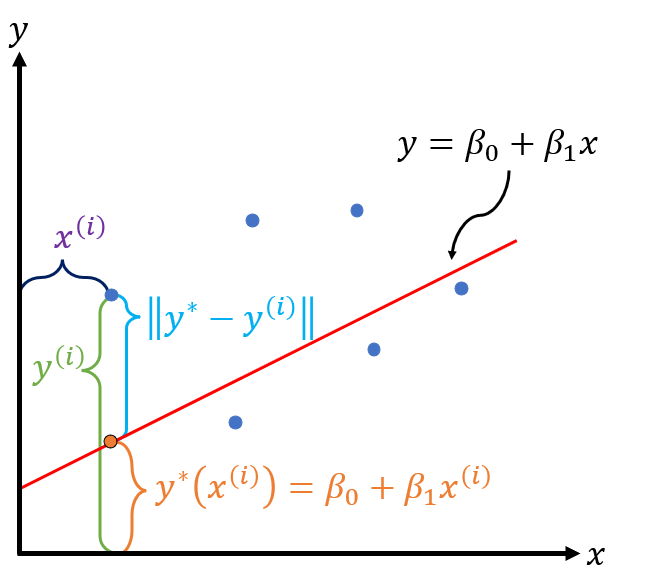


Aquí, $\beta = [\beta_0, \beta_1]^T$. Hay que notar que el problema de optimización anterior se puede reescribir como:

\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| y^{(j)}-\left ( β_{0} + \beta_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $β_{0} + \beta_1 x^{(j)}$, se puede escribir vectorialmente como:


\begin{align*}
  \beta_{0} + \beta_1 x^{(j)} = [1, x^{(j)}] \beta
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:

\begin{align*}
   \begin{bmatrix}
      β_{0} + \beta_1 x^{(1)}\\
      β_{0} + \beta_1 x^{(2)}\\
      \vdots\\
      β_{0} + \beta_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1
   \end{bmatrix}
\end{align*}

La matriz que acompaña a $\beta$ se nombrará $H$. El problema de optimización se reescribe entonces como :

 \begin{align*}
   \min_{\beta\in\mathbb{R}^n}||y-H\beta||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.

La solución a este problema se denota $\beta^*=[\beta_0^*,\beta_1^*]^T$, los cuales son los coeficientes que resuelven el problema. El potencial de este método radica en su solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Esta solución es:

\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty .
 \end{align*}

Usando el mismo procedimiento, se pueden realizar proceso de regresión para ecuaciones con un grado polinómico más alto, como por ejemplo:

\begin{align*}
   y = g(x;\beta)=\sum_{i=0}^{n} \beta_i x^i
\end{align*}

Si rescribe lo anterior de forma matricial para todos los $m$ puntos, queda:

\begin{align*}
   \begin{bmatrix}
      1 & x^{(1)} & \left(x^{(1)}\right)^2 & \cdots & \left(x^{(1)}\right)^n\\
      1 & x^{(2)} & \left(x^{(2)}\right)^2 & \cdots & \left(x^{(2)}\right)^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots \\
      1 & x^{(m)} & \left(x^{(m)}\right)^2 & \cdots & \left(x^{(m)}\right)^n\\
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \vdots\\
    \beta_n
   \end{bmatrix}
\end{align*}

Donde la matriz que acompaña el vector $\beta$ es la nueva matriz $H$, por lo que, al final, la solución analítica se encuentra mediante la misma ecuación mencionada. Cabe resaltar que, con la lógica anterior, es posible encontrar analíticamente los coeficientes para cualquier ecuación deseada, por ejemplo, si se quisiera una combinación de funciones trigonométricas, es decir:

\begin{align*}
  y^*=\beta_0 + \beta_1\cos(x) + \beta_2\sin(x)
\end{align*}

Solo bastaría con modificar la matriz $H$ y solucionar el problema de la misma manera.


# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, que permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas para atender sus condiciones particulares de movimiento. Para determinar el valor de estas variables se estima inicialmente la aceleración del cuerpo de estudio a través del análisis de video o con el uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmente estimar la aceleración. Es fundamental que durante la medición de señales de posición, las posiciones estudiadas no varíen rápidamente entre sí para evitar la captura de ruido y obtener mediciones precisas.

# **Descripción de la práctica**

En esta prática se desea construir un modelo de Regresión que permita predecir la trayectoria que sigue el codo al abrir y cerrar una puerta, tal y como se muestra en el siguiente esquema:



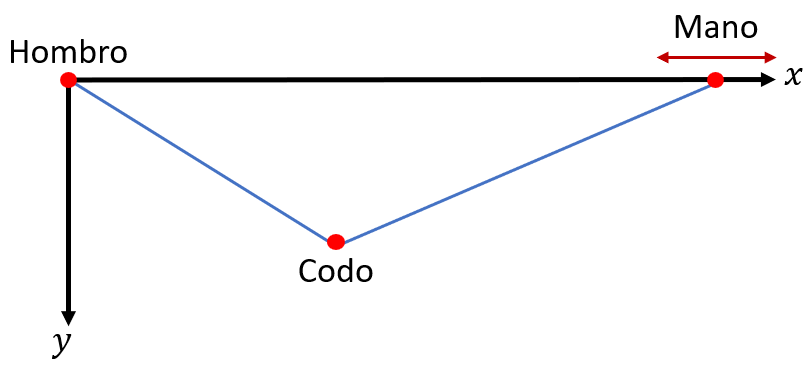

Para efectos de la prática, se definirán las siguientes variables:

- $t$: Tiempo transcurrido
- $x$: Posición horizontal del codo
- $y$: Posición vertical del codo

1. Importe los datos del archivo *regresion.xlsx*, donde la primera columna corresponde al tiempo $(t)$, la segunda a la posición horizontal $(x)$ y la tercera a la vertical $(y)$. Luego, construya los siguientes gráficos de dispersión (scatter):

- Posición vertical en función del tiempo ($t$, $y$)
- Posición vertical en función de la posición horizontal ($x$, $y$)


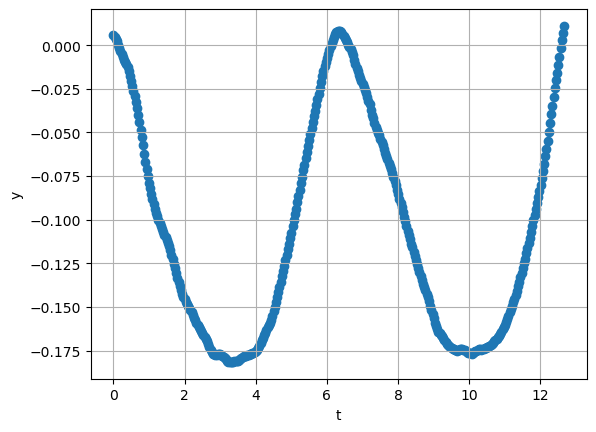

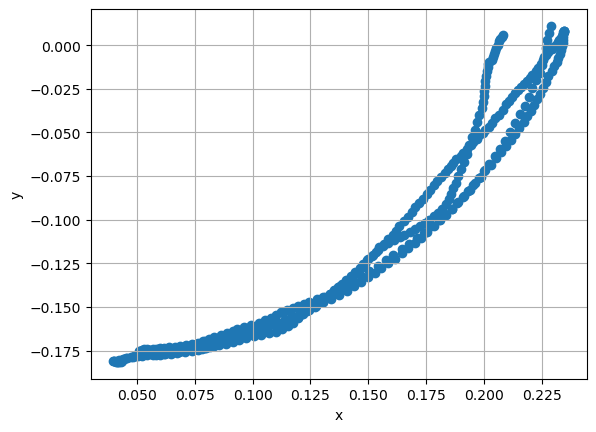

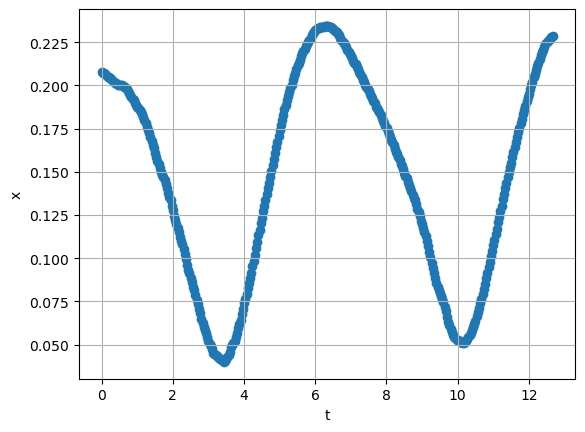

In [47]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leemos los datos desde un archivo Excel
data = pd.read_excel("regresion.xlsx")

# Convertimos las columnas del DataFrame en arrays de NumPy
x = data["x"].to_numpy()  # Variable independiente x
y = data["y"].to_numpy()  # Variable dependiente y
t = data["t"].to_numpy()  # Variable t

# Primer gráfico: Relación entre t e y
plt.scatter(t, y)  # Graficamos los puntos de t contra y
plt.xlabel("t")  # Etiqueta del eje x
plt.ylabel("y")  # Etiqueta del eje y
plt.grid()  # Mostramos la cuadrícula para mejor visualización
plt.show()  # Mostramos el gráfico

# Segundo gráfico: Relación entre x e y
plt.scatter(x, y)  # Graficamos los puntos de x contra y
plt.xlabel("x")  # Etiqueta del eje x
plt.ylabel("y")  # Etiqueta del eje y
plt.grid()  # Mostramos la cuadrícula para mejor visualización
plt.show()  # Mostramos el gráfico

# Tercer gráfico: Relación entre t y x
plt.scatter(t, x)  # Graficamos los puntos de t contra x
plt.xlabel("t")  # Etiqueta del eje x
plt.ylabel("x")  # Etiqueta del eje y
plt.grid()  # Mostramos la cuadrícula para mejor visualización
plt.show()  # Mostramos el gráfico


2. Implemente una función que reciba como argumentos el grado polinómico $n$ y un arreglo con los datos de la variable independiente, y que retorne la matriz $H$ correspondiente al grado polinómico.

In [48]:
import numpy as np

def H_matrix(x, n):
    """
    Parámetros:
    x (array-like): Datos de la variable independiente.
    n (int): Grado del polinomio.

    Retorna:
    H (ndarray): Matriz de diseño de la regresión polinómica de grado n.
    """
    # Número de puntos de datos en x
    m = len(x)

    # Inicializamos la matriz H con 1's, de tamaño m x (n+1) para los términos desde x^0 hasta x^n
    H = np.ones((m, n+1))

    # Llenamos la matriz con las potencias de x, de x^1 hasta x^n
    for i in range(m):  # Iteramos sobre los datos de la variable independiente
        for j in range(n):  # Iteramos sobre los grados del polinomio
            H[i][j+1] = x[i]**(j+1)  # Asignamos x[i] elevado a la potencia (j+1)

    return H


3. Implemente una función que reciba como argumentos la matriz $H$ y el arreglo de valores de la variable dependiente. Esta función debe retornar el arreglo de $\beta^*$.

In [49]:
def beta_sol(y, H):
    """
    Parámetros:
    y (array-like): Vector de valores de la variable dependiente.
    H (ndarray): Matriz de diseño (H) generada por la función H_matrix.

    Retorna:
    beta (ndarray): Arreglo con los coeficientes beta* calculados.
    """
    # Calculamos beta
    beta = np.linalg.inv(H.T @ H) @ H.T @ y
    
    return beta


4. Utilice las funciones que implementó en los puntos anteriores para encontrar los coeficientes óptimos de las siguientes relaciones:

- $y$ vs $t$
- $y$ vs $x$

Con cada uno con los siguientes grados polinómicos:

- Grado 1
- Grado 3
- Grado 5
- Grado 9

In [50]:
# y vs t

solyt_1 = beta_sol(y,H_matrix(t,1))
solyt_3 = beta_sol(y,H_matrix(t,3))
solyt_5 = beta_sol(y,H_matrix(t,5))
solyt_9 = beta_sol(y,H_matrix(t,9))

In [51]:
#y vs x

solxy_1 = beta_sol(y,H_matrix(x,1))
solxy_3 = beta_sol(y,H_matrix(x,3))
solxy_5 = beta_sol(y,H_matrix(x,5))
solxy_9 = beta_sol(y,H_matrix(x,9))

In [52]:
def f(x,beta):
    # Lista vacía para almacenar los valores ajustados
    y_fit = []

    # Iterar sobre cada valor de la variable independiente 'x'
    for i in x:
        value = 0  # Inicializamos el valor ajustado para cada punto
        
        # Sumar los términos del polinomio para cada valor de 'i'
        for j in range(1, len(beta) + 1):
            # Para cada coeficiente beta, multiplicamos por la potencia correspondiente de 'i'
            value += beta[j - 1] * i**(j - 1)
        
        # Agregar el valor calculado a la lista de valores ajustados
        y_fit.append(value)
    
    # Convertimos la lista en un arreglo de numpy para mayor eficiencia y consistencia
    y_fit = np.array(y_fit)

    # Retornamos el arreglo de valores ajustados
    return y_fit

5. Teniendo en cuenta los resultados del punto anterior, grafique nuevamente la dispersión inicial de los datos agregando esta vez las curvas obtenidas para cada conjunto de datos. El primer gráfico, debe incluir la dispersión entre la posición vertical $y$ y el tiempo $t$ y las tres curvas de regresión obtenidas para cada grado polinómico en este conjunto de datos. El segundo gráfico debe mostrar las mismas curvas anteriores pero para el conjunto de datos de la posición vertical $y$ y la posición horizontal $x$. Los gráficos esperados deberían tener la siguiente estructura:


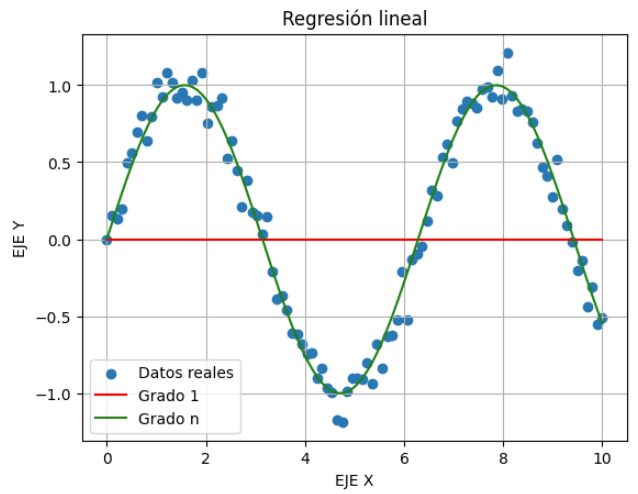

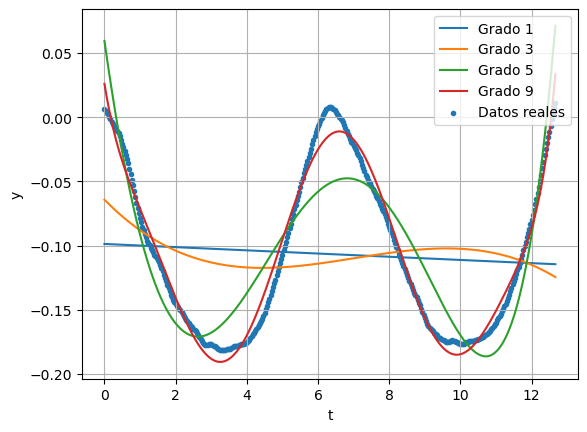

In [53]:
# Calculamos los valores ajustados de y para diferentes grados polinómicos usando la función f
yt1 = f(t, solyt_1)  # Ajuste de y para grado 1
yt3 = f(t, solyt_3)  # Ajuste de y para grado 3
yt5 = f(t, solyt_5)  # Ajuste de y para grado 5
yt9 = f(t, solyt_9)  # Ajuste de y para grado 9

# Graficamos los valores ajustados de y para cada grado
plt.plot(t, yt1, label="Grado 1")  # Línea para el ajuste de grado 1
plt.plot(t, yt3, label="Grado 3")  # Línea para el ajuste de grado 3
plt.plot(t, yt5, label="Grado 5")  # Línea para el ajuste de grado 5
plt.plot(t, yt9, label="Grado 9")  # Línea para el ajuste de grado 9

# Graficamos los datos reales
plt.scatter(t, y, marker=".", label="Datos reales")  # Puntos de datos reales

# Etiquetas para los ejes
plt.xlabel("t")  # Etiqueta para el eje x
plt.ylabel("y")  # Etiqueta para el eje y

# Añadimos una cuadrícula a la gráfica
plt.grid()

# Añadimos una leyenda para distinguir las curvas y los puntos de datos
plt.legend()

# Mostramos la gráfica
plt.show()

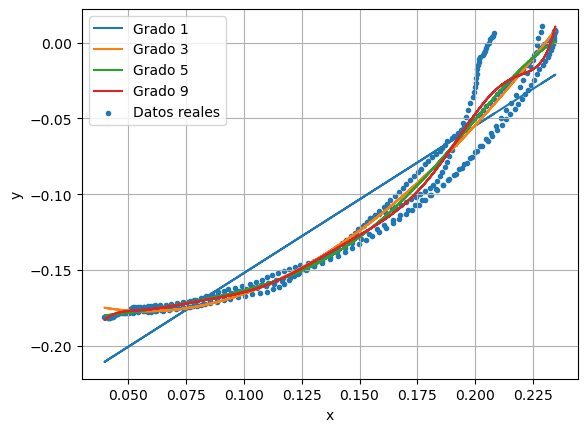

In [54]:

yx1 = f(x, solxy_1)  # Ajuste de y para grado 1
yx3 = f(x, solxy_3)  # Ajuste de y para grado 3
yx5 = f(x, solxy_5)  # Ajuste de y para grado 5
yx9 = f(x, solxy_9)  # Ajuste de y para grado 9

# Graficamos los valores ajustados de y para cada grado
plt.plot(x, yx1, label="Grado 1")  # Línea para el ajuste de grado 1
plt.plot(x, yx3, label="Grado 3")  # Línea para el ajuste de grado 3
plt.plot(x, yx5, label="Grado 5")  # Línea para el ajuste de grado 5
plt.plot(x, yx9, label="Grado 9")  # Línea para el ajuste de grado 9

# Graficamos los datos reales
plt.scatter(x, y, marker=".", label="Datos reales")  # Puntos de datos reales

# Etiquetas para los ejes
plt.xlabel("x")  # Etiqueta para el eje x
plt.ylabel("y")  # Etiqueta para el eje y

# Añadimos una cuadrícula a la gráfica
plt.grid()

# Añadimos una leyenda para distinguir las curvas y los puntos de datos
plt.legend()

# Mostramos la gráfica
plt.show()

6. Note que el conjunto de datos de la posición vertical en función del tiempo tiene un comportamiento oscilatorio. Implemente una función que reciba como argumento el arreglo de datos asociados a la variable independiente y que retorne la matriz $H$ que satisfaga la relación:

\begin{align*}
  y^*=\beta_0 + \beta_1\sin(t) + \beta_2\cos(t)
\end{align*}

In [ ]:
def H_new(t, n):
    # Inicializa la matriz H con una columna de unos, correspondiente al término independiente β₀
    H = [np.ones_like(t)]
    
    # Agrega n pares de columnas: sin(i*t) y cos(i*t) para i = 1 hasta n
    for i in range(1, n + 1):
        H.append(np.sin(i * t)) 
        H.append(np.cos(i * t))  

    # Combina todas las columnas en una sola matriz de diseño (cada fila es una observación)
    return np.column_stack(H)


In [56]:
H_new(t,1)

array([[1.        , 0.        , 1.        ],
       [1.        , 0.03332716, 0.9994445 ],
       [1.        , 0.0666173 , 0.9977786 ],
       ...,
       [1.        , 0.03529206, 0.99937704],
       [1.        , 0.06857552, 0.99764593],
       [1.        , 0.10178282, 0.99480664]])

7. Calcule los parámetros óptimos $\beta^*$ que ajustan el conjunto de datos ($t, y$) a la relación trigonométrica anterior.

In [57]:
beta_sol(y,H_new(t,1))

array([-0.10754661,  0.02470798,  0.08024588])

8. Grafique la dispersión inicial de la posición vertical $y$ en función del tiempo $t$ agregando la regresión polinómica de grado 9 calculada previamente y la regresión trigonométrica que acaba de obtener.

In [58]:
def f_new(t, beta, n):
    # Asegura que t sea un arreglo de NumPy (por si se entrega como lista)
    t = np.asarray(t)

    # Inicializa el resultado de y_fit con el término independiente beta[0]
    y_fit = beta[0] * np.ones(len(t))

    # Construye la serie trigonométrica con n términos (hasta seno y coseno de n*t)
    for i in range(1, n + 1):
        # Suma el término correspondiente a sin(i*t) y cos(i*t)
        # Cada i requiere dos coeficientes: uno para sin(i*t) y otro para cos(i*t)
        y_fit += beta[2*i - 1] * np.sin(i * t) + beta[2*i] * np.cos(i * t)
         
    # Devuelve el valor ajustado de y para cada t
    return y_fit


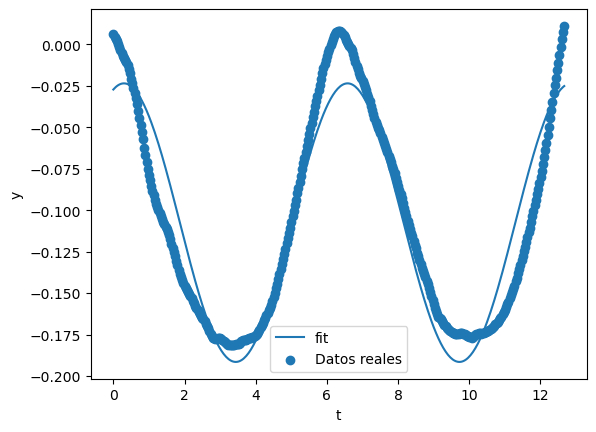

In [59]:
yt_new = f_new(t,beta_sol(y,H_new(t,1)),1)

plt.plot(t,yt_new, label="fit")
plt.scatter(t,y,label="Datos reales")

plt.ylabel("y")
plt.xlabel("t")
plt.legend()

9. Implemente una función que calcule el error cuadrático medio (MSE) entre los valores $y$ medidos y las predicciones que se obtienen usando la regresión polinómica (grados 1,3,5 y 9) y trigonométrica para el conjunto de datos ($t, y$). Imprima de forma adecuada estos valores.

In [60]:
def MSE(y_fit, y0):
    return (1/len(y0))*np.sum( (y_fit - y0)**2 )

In [61]:
print("Errores Cuadráticos Medios (MSE) para regresión polinómica en (t, y):")
print(f"Grado  1: {MSE(yt1, y):.8f}")
print(f"Grado  3: {MSE(yt3, y):.8f}")
print(f"Grado  5: {MSE(yt5, y):.8f}")
print(f"Grado  9: {MSE(yt9, y):.8f}")

Errores Cuadráticos Medios (MSE) para regresión polinómica en (t, y):
Grado  1: 0.00392813
Grado  3: 0.00382465
Grado  5: 0.00070985
Grado  9: 0.00008231


In [62]:
print("Error Cuadrático Medio (MSE) para la regresión trigonométrica en (t, y):")
print(f"MSE: {MSE(yt_new, y):.8f}")


Error Cuadrático Medio (MSE) para la regresión trigonométrica en (t, y):
MSE: 0.00039213


In [63]:
print("Error Cuadrático Medio (MSE) para regresión polinómica en (x, y):")
print(f"Grado 1 : {MSE(yx1, y):.8f}")
print(f"Grado 3 : {MSE(yx3, y):.8f}")
print(f"Grado 5 : {MSE(yx5, y):.8f}")
print(f"Grado 9 : {MSE(yx9, y):.8f}")


Error Cuadrático Medio (MSE) para regresión polinómica en (x, y):
Grado 1 : 0.00042896
Grado 3 : 0.00013960
Grado 5 : 0.00012937
Grado 9 : 0.00011916


10. Teniendo el cuenta los valores de la función objetivo, responda:

- Para el gráfico de $y$ vs $t$, ¿cuál grado fue mejor?

En la gráfica de $y$ en función de $t$, se observa que el ajuste mejora considerablemente a medida que se incrementa el grado del polinomio. El polinomio de grado 9 fue el que mejor se ajustó a los datos reales, ya que logró capturar la forma ondulada y periódica de la señal. En contraste, los polinomios de grados más bajos (1, 3 y 5) no logran modelar adecuadamente los picos y valles de la curva.


- Para el gráfico de $y$ vs $x$, ¿cuál grado fue mejor?

En el gráfico de $y$ en función de $x$, el comportamiento de los datos es más suave y no presenta oscilaciones tan marcadas como en el caso anterior. Aún así, el polinomio de grado 9 mostró un mejor ajuste en comparación con los de menor grado, adaptándose mejor a los cambios de curvatura en la relación entre $x$ e $y$.

- ¿Qué diferencias encuentra en los resultados de regresión para el conjunto de datos ($t$,$y$) en comparación con el conjunto ($x$,$y$)?

La regresión sobre el conjunto $(t, y)$ presenta mayores desafíos debido a la naturaleza periódica de los datos. En este caso, se requieren polinomios de grado más alto para capturar la forma oscilatoria. Por otro lado, el conjunto $(x, y)$ exhibe un comportamiento más regular y menos fluctuante, lo que permite que incluso polinomios de grado medio logren un ajuste razonable.

- ¿Considera que la regresión con funciones trigonométricas tuvo mejores o peores resultados que la regresión polinómica?

La regresión polinómica mostró mejores resultados que la regresión con funciones trigonométricas, especialmente en el caso del conjunto de datos $(t, y)$. En particular, el modelo polinómico de grado 9 logró un menor error cuadrático medio (MSE) en comparación con el modelo trigonométrico, lo que indica un ajuste más preciso a los datos. 

- Aumente el grado polinómico por encima de 10 y analice los resultados para ambos conjuntos de datos, $(t,y)$ y $(x,y)$. ¿Cree que aumentar el grado polinómico hará que el error tienda a cero?

Al incrementar el grado del polinomio por encima de 10, se observaron distintos comportamientos en los conjuntos de datos $(t, y)$ y $(x, y)$:

En el caso de $(t, y)$, aunque el MSE se reduce significativamente al pasar de grado 9 a 10 (de 8.23e-05 a 2.63e-05), a partir de grado 11 comienza a incrementarse de forma notoria y, desde grado 12 en adelante, el error crece de manera drástica. Esto se debe a un fuerte sobreajuste (overfitting), donde el modelo intenta capturar incluso el ruido de los datos. Este fenómeno es especialmente crítico en grados elevados como el 25 o el 26, donde el MSE alcanza valores superiores a 6,000 y 30,000, respectivamente. Se trata de un caso típico del efecto Runge, que genera oscilaciones indeseadas y pérdida de generalización.

En el conjunto $(x, y)$, el aumento del grado también produce variaciones en el MSE, aunque de forma más contenida. Hasta aproximadamente el grado 24, los errores se mantienen relativamente bajos (alrededor de 1e-4), lo que sugiere que el modelo aún es capaz de representar bien los datos. Sin embargo, a partir del grado 25, el MSE comienza a crecer rápidamente, alcanzando 0.00097 en grado 27 y 0.0496 en grado 29, lo que también indica sobreajuste progresivo.

In [64]:
#Aumentando el grado polinomico plano ty:

for i in range(9,30):
    y_fit = f(t,beta_sol(y,H_matrix(t,i)))
    print("MSE Polinomio grado {0}: {1}".format(i, MSE(y_fit,y)))

MSE Polinomio grado 9: 8.231412457673437e-05
MSE Polinomio grado 10: 2.5047724740772762e-05
MSE Polinomio grado 11: 8.146581334815839e-05
MSE Polinomio grado 12: 0.07938833929621208
MSE Polinomio grado 13: 0.0005077146928525902
MSE Polinomio grado 14: 0.0575908656950966
MSE Polinomio grado 15: 0.08658675190418681
MSE Polinomio grado 16: 0.46193055747768413
MSE Polinomio grado 17: 0.06597896875706259
MSE Polinomio grado 18: 39.483843089180205
MSE Polinomio grado 19: 7.720082156233734
MSE Polinomio grado 20: 169.9424166621954
MSE Polinomio grado 21: 24.56069228452161
MSE Polinomio grado 22: 690.0347790430748
MSE Polinomio grado 23: 0.9211632562762063
MSE Polinomio grado 24: 260.94177719361477
MSE Polinomio grado 25: 152.44300541497384
MSE Polinomio grado 26: 1134.606912712799
MSE Polinomio grado 27: 1172.4030915073395
MSE Polinomio grado 28: 1070.6409061532872
MSE Polinomio grado 29: 13352146.548544817


In [65]:
#Aumentando el grado polinomico plano xy:

for i in range(9,30):
    y_fit = f(x,beta_sol(y,H_matrix(x,i)))
    print("MSE Polinomio grado {0}: {1}".format(i, MSE(y_fit,y)))

MSE Polinomio grado 9: 0.00011915642945548933
MSE Polinomio grado 10: 0.00011939844825050484
MSE Polinomio grado 11: 0.00015459930261330174
MSE Polinomio grado 12: 0.00011771820796700434
MSE Polinomio grado 13: 0.00011314238280549242
MSE Polinomio grado 14: 0.00011620427530449453
MSE Polinomio grado 15: 0.00011054679084074786
MSE Polinomio grado 16: 0.00022213167700708375
MSE Polinomio grado 17: 0.00011758815578963212
MSE Polinomio grado 18: 0.00011315487527188665
MSE Polinomio grado 19: 0.00011324958595311922
MSE Polinomio grado 20: 0.00011124306666874102
MSE Polinomio grado 21: 0.00014638323845943653
MSE Polinomio grado 22: 0.00011226263820735258
MSE Polinomio grado 23: 0.00011390719375592535
MSE Polinomio grado 24: 0.009382038172649916
MSE Polinomio grado 25: 0.00022891486776387796
MSE Polinomio grado 26: 0.0001051602788475159
MSE Polinomio grado 27: 0.00010633356755540164
MSE Polinomio grado 28: 0.00011005591757390237
MSE Polinomio grado 29: 0.00010676893248897019
